In [2]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
import tensorflow as tf
import random  
from sklearn.preprocessing import LabelEncoder

In [3]:
# image path
path = "C:/users/pc/breast_cancer_project/all-mias/"


In [4]:
# Read data
print("reading dataset")
info = pd.read_csv(
    "C:/users/pc/breast_cancer_project/Info.txt", sep=" ")
info=info.drop('Unnamed: 7',axis=1)

reading dataset


In [4]:
info

,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS
0,mdb001,G,CIRC,B,535.0,425.0,197.0
1,mdb002,G,CIRC,B,522.0,280.0,69.0
2,mdb003,D,NORM,NaN,NaN,NaN,NaN
3,mdb004,D,NORM,NaN,NaN,NaN,NaN
4,mdb005,F,CIRC,B,477.0,133.0,30.0
...,...,...,...,...,...,...,...
325,mdb318,D,NORM,NaN,NaN,NaN,NaN
326,mdb319,D,NORM,NaN,NaN,NaN,NaN
327,mdb320,D,NORM,NaN,NaN,NaN,NaN
328,mdb321,D,NORM,NaN,NaN,NaN,NaN


In [5]:
new_dataframe = info.replace(['CALC', 'CIRC', 'SPIC', 'MISC', 'ARCH', 'ASYM'], 'ANORM')


In [6]:
new_dataframe

,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS
0,mdb001,G,ANORM,B,535.0,425.0,197.0
1,mdb002,G,ANORM,B,522.0,280.0,69.0
2,mdb003,D,NORM,NaN,NaN,NaN,NaN
3,mdb004,D,NORM,NaN,NaN,NaN,NaN
4,mdb005,F,ANORM,B,477.0,133.0,30.0
...,...,...,...,...,...,...,...
325,mdb318,D,NORM,NaN,NaN,NaN,NaN
326,mdb319,D,NORM,NaN,NaN,NaN,NaN
327,mdb320,D,NORM,NaN,NaN,NaN,NaN
328,mdb321,D,NORM,NaN,NaN,NaN,NaN


In [6]:
lb = LabelEncoder()
new_dataframe['CLASS'] = lb.fit_transform(new_dataframe['CLASS'])
new_dataframe

,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS
0,mdb001,G,0,B,535.0,425.0,197.0
1,mdb002,G,0,B,522.0,280.0,69.0
2,mdb003,D,1,NaN,NaN,NaN,NaN
3,mdb004,D,1,NaN,NaN,NaN,NaN
4,mdb005,F,0,B,477.0,133.0,30.0
...,...,...,...,...,...,...,...
325,mdb318,D,1,NaN,NaN,NaN,NaN
326,mdb319,D,1,NaN,NaN,NaN,NaN
327,mdb320,D,1,NaN,NaN,NaN,NaN
328,mdb321,D,1,NaN,NaN,NaN,NaN


In [7]:
label = new_dataframe.CLASS
label_array = np.array(label)
label_array

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,

In [8]:
label = []
for i in range (len(new_dataframe)):
    if new_dataframe.CLASS[i] == 0:
        label.append(0)
    else:
        label.append(1)

In [9]:
img_name = []

for i in range(len(label)):
    img_name.append(path + new_dataframe.REFNUM[i]+ ".pgm")

In [10]:
img_name = np.array(img_name)

In [11]:
print(f"image address count {img_name.shape}")

image address count (330,)


Text(0.5, 1.0, '0')

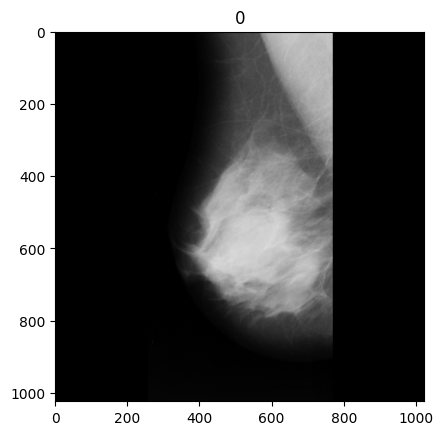

In [13]:
plt.imshow(cv2.imread(img_name[0]))
plt.title(label[0])

In [12]:
# read image, labels of images

img_path = []
last_label = []
for i in range(len(img_name)):

    img = cv2.imread(img_name[i], 0)
    img = cv2.resize(img, (128,128))
    img_path.append(img)
    last_label.append(label[i])


In [13]:
last_label = np.array(last_label)
last_label

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,

In [14]:
# split train and test set
x_train, x_test, y_train, y_test = train_test_split(img_path, last_label, test_size=0.20, random_state=42)


In [15]:
len(x_train),len(x_test),len(y_train),len(y_test)

(264, 66, 264, 66)

In [16]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

x_train = np.reshape(x_train, (264, 128, 128, 1))  # 1 for gray scale
x_test = np.reshape(x_test, (66, 128, 128, 1))

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support
from sklearn.neighbors import KNeighborsClassifier
from exc_dist import exc_dist_dist
from functools import partial

x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

x_train_scaled = x_train_flat / 255
x_test_scaled = x_test_flat / 255

# List of distance metrics to try
distance_metrics = ['euclidean', 'manhattan', 'minkowski', 'chebyshev']
prime_numbers = [2,3,5,7,11,13,17,19,23,29]
n_neighbors = 3 


def create_knn_model(metric, x_train, y_train, n):
    if metric == 'exc_dist':
        for i in prime_numbers:
            exc_dist_decimal = 2  # Set the desired decimal places for rounding in the exclusive distance
            distance_func = partial(
                exc_dist_dist, exc_dist_p=i, dist_dec=exc_dist_decimal)

            # Create knn model with the current distance metric
            knn_model = KNeighborsClassifier(
                n_neighbors=n, metric=distance_func)
            knn_model.fit(x_train_scaled, y_train)
            results['exc_dist'][i] = evaluate_model(knn_model)
        
    else:
        distance_func = metric
        knn_model = KNeighborsClassifier(n_neighbors=n_neighbors, metric=distance_func)
        knn_model.fit(x_train, y_train)
        results[metric] = evaluate_model(knn_model)


def evaluate_model(model):
    y_pred = model.predict(x_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(
        y_test, y_pred, output_dict=True)
    return {
        'Accuracy': accuracy,
        'Confusion Matrix': conf_matrix,
        'Classification Report': classification_rep
    }
  

# Dictionary to store results
results = {'exc_dist':{}}

for metric in distance_metrics + ['exc_dist']:
    create_knn_model(metric, x_train_scaled, y_train, n_neighbors)

# Print the results for each metric
for metric, metric_results in results.items():
    if metric == 'exc_dist':
        for prime_number, prime_results in metric_results.items():
            print(f"Metric: exc_dist_{prime_number}")
            print(f"Accuracy: {prime_results['Accuracy']}")
            print("Confusion Matrix:")
            print(prime_results['Confusion Matrix'])
            print("Classification Report:")
            print(prime_results['Classification Report'])
            print("\n")
        
    else:
        print(f"Metric: {metric}")
        print(f"Accuracy: {metric_results['Accuracy']}")
        print("Confusion Matrix:")
        print(metric_results['Confusion Matrix'])
        print("Classification Report:")
        print(metric_results['Classification Report'])
        print("\n")


In [ ]:
# default knn, svm ve random forest karsilastirmasi icin

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Dictionary to store results for Random Forest and SVM
results = {'knn': {}, 'random_forest': {}, 'svm': {}}


def create_rf_model(x_train, y_train):
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(x_train, y_train)
    return rf_model

def create_svm_model(x_train, y_train):
    svm_model = SVC(kernel='linear', random_state=42)
    svm_model.fit(x_train, y_train)
    return svm_model

# Create and evaluate KNN model
knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
knn_model.fit(x_train_scaled, y_train)
results['knn'] = evaluate_model(knn_model)

# Create and evaluate Random Forest model
rf_model = create_rf_model(x_train_scaled, y_train)
results['random_forest'] = evaluate_model(rf_model)

# Create and evaluate SVM model
svm_model = create_svm_model(x_train_scaled, y_train)
results['svm'] = evaluate_model(svm_model)

# Print the results for each algorithm
for algorithm, algorithm_results in results.items():
    print(f"Algorithm: {algorithm.upper()}")
    print(f"Accuracy: {algorithm_results['Accuracy']}")
    print("Confusion Matrix:")
    print(algorithm_results['Confusion Matrix'])
    print("Classification Report:")
    print(algorithm_results['Classification Report'])
    print("\n")


WRITE THE RESULTS TO THE EXCEL FILE

In [22]:
import os

def write_results_to_excel(results, excel_file_path, n_neighbors, sheet_name):
    columns = ['Distance', 'n', 'p', 'Accuracy', 'Mic_Recall', 'Mic_Precision',
               'Mic_F1_Score', 'Mac_Recall', 'Mac_Precision', 'Mac_F1_Score']

    # Check if the Excel file already exists
    if os.path.exists(excel_file_path):
        # Load the existing data from the Excel file
        existing_data = pd.read_excel(excel_file_path, sheet_name=None)
    else:
        existing_data = {}

    # Create a DataFrame to store the new results
    df_results = pd.DataFrame(columns=columns)

    for metric, metric_results in results.items():
        if metric == 'exc_dist':
            prime_numbers = list(metric_results.keys())
            for prime_number in prime_numbers:
                prime_results = metric_results[prime_number]
                distance = 'exc_dist'
                # Get the accuracy if available, otherwise set to None
                accuracy = prime_results.get('Accuracy', None)
                # Get the classification report if available, otherwise set to None
                classification_report = prime_results.get(
                    'Classification Report', None)

                if classification_report:
                    mac_recall = classification_report['macro avg']['recall']
                    mac_precision = classification_report['macro avg']['precision']
                    mac_f1 = classification_report['macro avg']['f1-score']
                else:
                    mac_recall, mac_precision, mac_f1 = None, None, None

                df_results = df_results.append({
                    'Distance': distance,
                    'n': n_neighbors,
                    'Accuracy': accuracy,
                    'p': prime_number,
                    'Mac_Recall': mac_recall,
                    'Mac_Precision': mac_precision,
                    'Mac_F1_Score': mac_f1,
                }, ignore_index=True)
        else:
            distance = metric
            # Get the accuracy if available, otherwise set to None
            accuracy = metric_results.get('Accuracy', None)
            # Get the classification report if available, otherwise set to None
            classification_report = metric_results.get(
                'Classification Report', None)

            if classification_report:
                mac_recall = classification_report['macro avg']['recall']
                mac_precision = classification_report['macro avg']['precision']
                mac_f1 = classification_report['macro avg']['f1-score']
            else:
                mac_recall, mac_precision, mac_f1 = None, None, None

            df_results = df_results.append({
                'Distance': distance,
                'n': n_neighbors,
                'Accuracy': accuracy,
                'p': '',
                'Mac_Recall': mac_recall,
                'Mac_Precision': mac_precision,
                'Mac_F1_Score': mac_f1,
            }, ignore_index=True)

    # Save the new results to the specified sheet
    with pd.ExcelWriter(excel_file_path, engine='xlsxwriter') as writer:
        if sheet_name in existing_data:
            existing_data[sheet_name] = pd.concat(
                [existing_data[sheet_name], df_results], ignore_index=True)
        else:
            existing_data[sheet_name] = df_results
        for sheet, data in existing_data.items():
            data.to_excel(writer, sheet_name=sheet, index=False)


# excel file path
excel_file_path = 'reports.xlsx'
sheet_name = 'knn_classification'  # Change this to the desired sheet name

write_results_to_excel(results, excel_file_path, n_neighbors, sheet_name)
